# Generating Data

## Import libraries 

In [29]:
import numpy as np
import math
import sys
import copy
import time
import matplotlib.pyplot as plt
import scipy.io

## Import libraries of numerical methods

In [30]:
sys.path.append('D:/Users/Roberth/Desktop/2D_Pinns/')
from Numerical.SolversLSM import ENO_2D as eno2
from Numerical.SolversLSM import Runge_Kutta_2D as rk2
from Numerical.SolversLSM import LSM_functions as lf

## Uniform grid

In [31]:
x_min = 0
x_max = 1
y_min = 0
y_max = 1
nodes = 64

x, dx = np.linspace(x_min, x_max, nodes, retstep=True)
y, dy = np.linspace(y_min, y_max, nodes, retstep=True)

X, Y = np.meshgrid(x, y, indexing='ij')

## Signed distance function
- Zalesak disk
- Circule
- Square
- Packman

In [32]:
phi = lf.zalesak_disk(X, Y, 0.5, 0.75, 0.15, 0.50, 0.60, 0.10, 0.25)

## Image of SDF

Text(0.5, 1.0, 'Signed Distance Function')

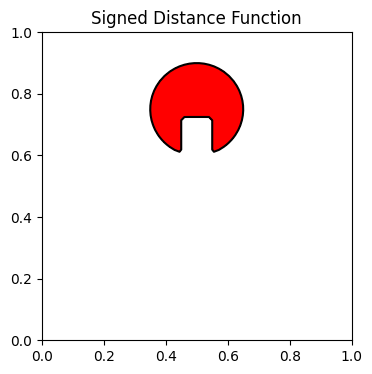

In [33]:
plt.figure(figsize=(4, 4))
plt.contourf(X, Y, phi, levels=[-1e6, 0], colors='red')
plt.contour(X, Y, phi, levels=[0], colors='black')
plt.title('Signed Distance Function')

## Vector Field
- Dynamics systems

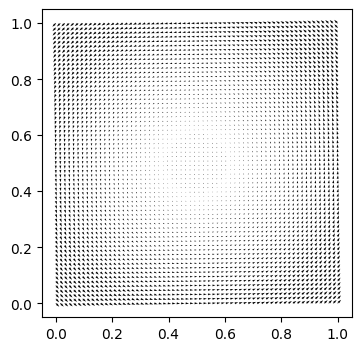

In [34]:
u = (math.pi / 314) * (.5 - Y)
v = (math.pi / 314) * (X - .5)

plt.figure(figsize=(4, 4))
plt.quiver(X, Y, u, v)

## Simulation

In [35]:
# n_simu_steps = 6280
# dt = 0.1

# ## Save solutions
# PHI = phi.copy()[None, None, ...]
# U = u.copy()[None, ...]
# V = v.copy()[None, ...]
# start_time = time.time()

# for step in range(n_simu_steps):
#     dxb, dxf, dyb, dyf = eno2.eno(phi, dx, dy)
#     phi = rk2.tvd_runge_kutta_2d_3o(phi, u, v, dxb, dxf, dyb, dyf, dx, dy, dt)
#     if (step + 1) % 5 == 0:
#         # print(f't_now = {step}')
#         PHI = np.concatenate((PHI, phi[None, None, ...]), axis=0)
#         U = np.concatenate((U, u[None, ...]), axis=0)
#         V = np.concatenate((V, v[None, ...]), axis=0)

# UV = np.concatenate((U[None, ...], V[None, ...]), axis=0)
# UV = np.transpose(UV, [1, 0, 2, 3])
# end_time = time.time()
# elapsed_time = end_time - start_time
# print("Tiempo de ejecución:", elapsed_time, "segundos")
# data_save_dir = 'D:/Users/Roberth/Desktop/2D_Pinns/Data/LSM_data/'
# scipy.io.savemat(data_save_dir + 'LSM_1256x1x64x64.mat', {'phi': PHI})
# scipy.io.savemat(data_save_dir + 'UV_1256x2x64x64.mat', {'uv': UV})

## Visualización de las soluciones en diferentes tiempos

In [36]:
data_dir = 'D:/Users/Roberth/Desktop/2D_Pinns/Data/LSM_data/LSM_1256x1x64x64.mat'
data = scipy.io.loadmat(data_dir)
phi_sol = data['phi']

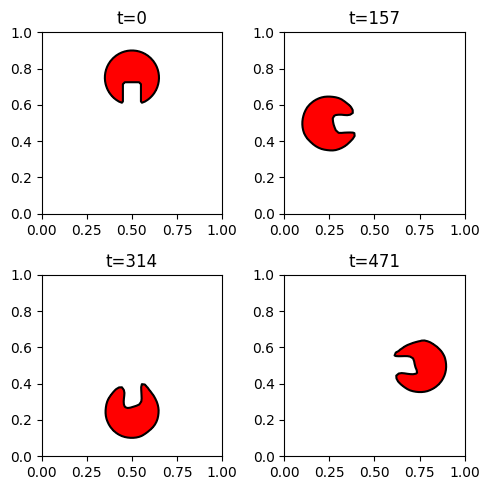

In [37]:
## Subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(5, 5))

axs[0, 0].contourf(X, Y, phi_sol[0, 0, :, :], levels=[-1e6, 0], colors='red')
axs[0, 0].contour(X, Y, phi_sol[0, 0, :, :], levels=[0], colors='black')
axs[0, 0].set_title('t=0')

axs[0, 1].contourf(X, Y, phi_sol[314, 0, :, :], levels=[-1e6, 0], colors='red')
axs[0, 1].contour(X, Y, phi_sol[314, 0, :, :], levels=[0], colors='black')
axs[0, 1].set_title('t=157')

axs[1, 0].contourf(X, Y, phi_sol[628, 0, :, :], levels=[-1e6, 0], colors='red')
axs[1, 0].contour(X, Y, phi_sol[628, 0, :, :], levels=[0], colors='black')
axs[1, 0].set_title('t=314')

axs[1, 1].contourf(X, Y, phi_sol[942, 0, :, :], levels=[-1e6, 0], colors='red')
axs[1, 1].contour(X, Y, phi_sol[942, 0, :, :], levels=[0], colors='black')
axs[1, 1].set_title('t=471')

plt.tight_layout()

plt.show()
